In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '../kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d "sakshigoyal7/credit-card-customers"

Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
100% 379k/379k [00:00<00:00, 557kB/s]
100% 379k/379k [00:00<00:00, 557kB/s]


In [ ]:
!unzip credit-card-customers.zip

Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


In [ ]:
data = pd.read_csv('BankChurners.csv')
data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].replace({'M': 1, 'F': 0})
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
data['Education_Level'] = data['Education_Level'].replace({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate' : 6})
data['Marital_Status'] = LabelEncoder().fit_transform(data['Marital_Status'])
data['Income_Category'] = LabelEncoder().fit_transform(data['Income_Category'])
data['Card_Category'] = LabelEncoder().fit_transform(data['Card_Category'])


<ipython-input-9-827eb1486f53>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'M': 1, 'F': 0})
<ipython-input-9-827eb1486f53>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
<ipython-input-9-827eb1486f53>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

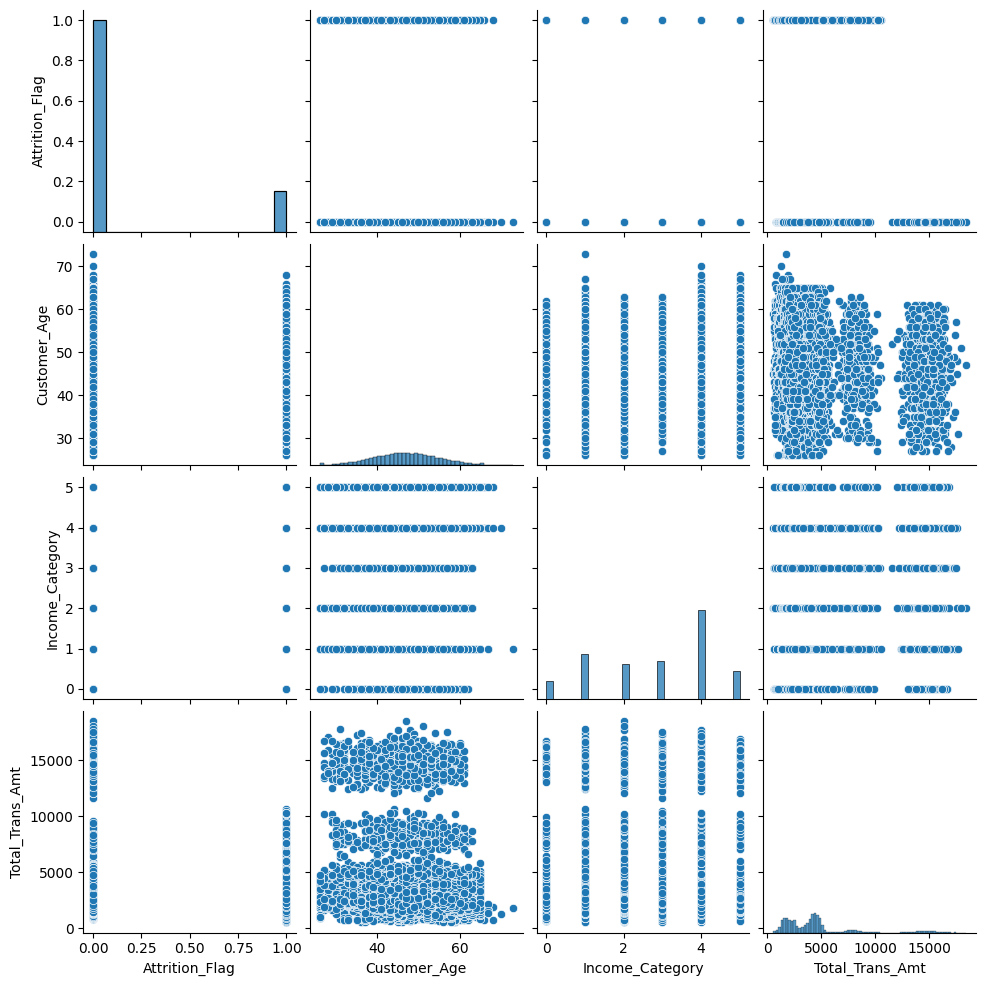

In [ ]:
sns.pairplot(data[['Attrition_Flag', 'Customer_Age', 'Income_Category', 'Total_Trans_Amt']])

<Axes: >

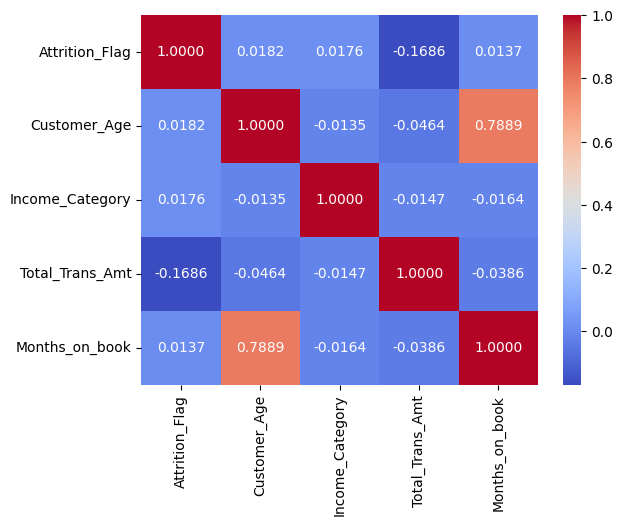

In [ ]:
correl = data[['Attrition_Flag', 'Customer_Age', 'Income_Category', 'Total_Trans_Amt', 'Months_on_book']].corr()
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt=".4f")

In [ ]:
correl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Attrition_Flag to Months_on_book
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   5 non-null      float64
 1   Customer_Age     5 non-null      float64
 2   Income_Category  5 non-null      float64
 3   Total_Trans_Amt  5 non-null      float64
 4   Months_on_book   5 non-null      float64
dtypes: float64(5)
memory usage: 412.0+ bytes


In [ ]:
data.isna().any().any()

False

In [ ]:
data['Attrition_Flag'] = 1 - data['Attrition_Flag']

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,2,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,4,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,4,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,2,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,1,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


([<matplotlib.patches.Wedge at 0x7fbae5442e00>,
 [Text(-0.9628371444551311, 0.5319254019667504, '1'),
  Text(0.9628371693563555, -0.5319253568930898, '0')])

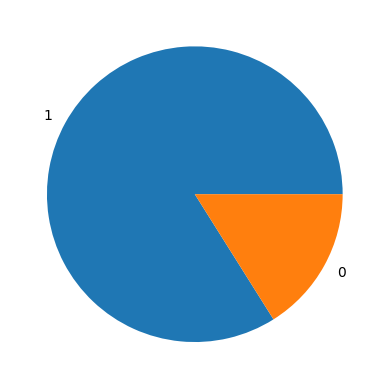

In [ ]:
import matplotlib.pyplot as plt
category_counts = data['Attrition_Flag'].value_counts()
plt.pie(category_counts, labels=category_counts.index)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
data_asnp = np.array(data)
Y = data_asnp[:, 1]
X = np.delete(data_asnp, 1, axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=43)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.25, random_state=43)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l1', tol = 1e-3, solver = 'liblinear', random_state=43).fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

0.9052007899934167

In [ ]:
Y_pred_val = model.predict(X_val)
f1_score(Y_val, Y_pred_val, average='micro')

0.903353057199211

Text(0.5, 1.0, 'Confusion Matrix')

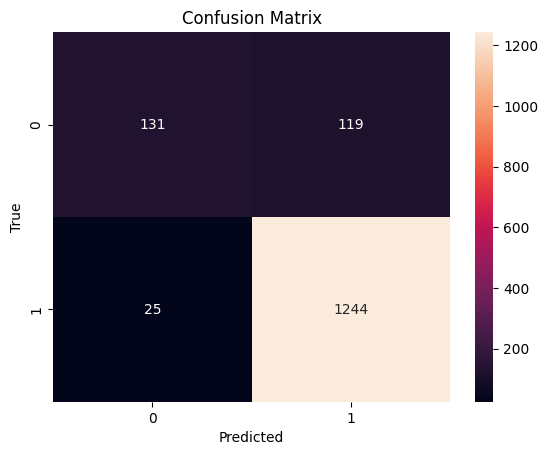

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.52      0.65       250
         1.0       0.91      0.98      0.95      1269

    accuracy                           0.91      1519
   macro avg       0.88      0.75      0.80      1519
weighted avg       0.90      0.91      0.90      1519



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=43)
X_new, Y_new = smote.fit_resample(X_train, Y_train)
model_new = LogisticRegression(penalty = 'l1', tol = 1e-3, solver = 'saga', random_state=43, max_iter = 1000).fit(X_new, Y_new)
Y_pred_new = model_new.predict(X_test)

In [ ]:
Y_new.shape

(13598,)

In [ ]:
print(X_new.shape)
print(X_train.shape)

(13598, 20)
(8101, 20)


In [ ]:
from collections import Counter
print(Counter(Y_new))
print(Counter(Y_pred_new))
Y_train.shape

Counter({1.0: 6799, 0.0: 6799})
Counter({1.0: 1519})


(8101,)

In [ ]:
print(f1_score(Y_test, Y_pred_new, average='micro'))
print(classification_report(Y_test, Y_pred_new))

0.8354180381830152
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       250
         1.0       0.84      1.00      0.91      1269

    accuracy                           0.84      1519
   macro avg       0.42      0.50      0.46      1519
weighted avg       0.70      0.84      0.76      1519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
smote = SMOTE(random_state=43)
X_new, Y_new = smote.fit_resample(X_train, Y_train)
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
X_test = scaler.fit_transform(X_test)
X_new, Y_new = shuffle(X_new, Y_new, random_state=43)
model_new = LogisticRegression(penalty = 'l1', tol = 1e-4, solver = 'saga', random_state=43, max_iter = 10000, class_weight = 'balanced').fit(X_new, Y_new)
Y_pred_new = model_new.predict(X_test)

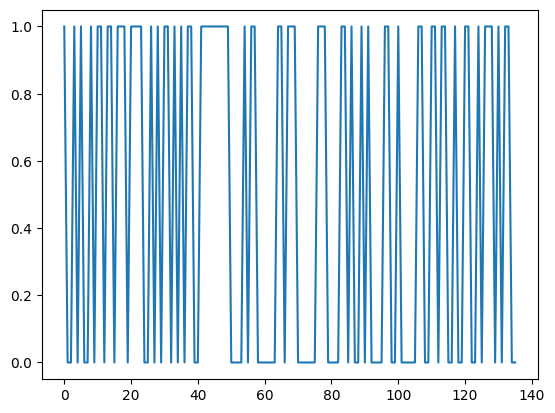

In [ ]:
Y_plt = []
c = 0
for i in Y_new:
    if c % 100 == 0:
        Y_plt.append(i)
    c+=1
plt.plot(Y_plt)

In [ ]:
print(f1_score(Y_test, Y_pred_new, average='micro'))
print(classification_report(Y_test, Y_pred_new))

0.7156023699802502
              precision    recall  f1-score   support

         0.0       0.36      0.96      0.53       250
         1.0       0.99      0.67      0.80      1269

    accuracy                           0.72      1519
   macro avg       0.67      0.81      0.66      1519
weighted avg       0.88      0.72      0.75      1519



Text(0.5, 1.0, 'Confusion Matrix')

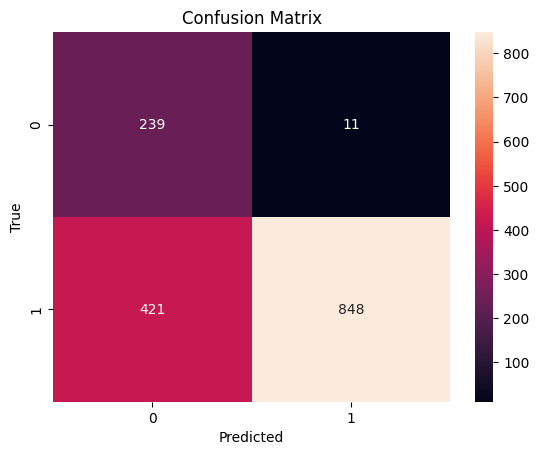

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_new)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

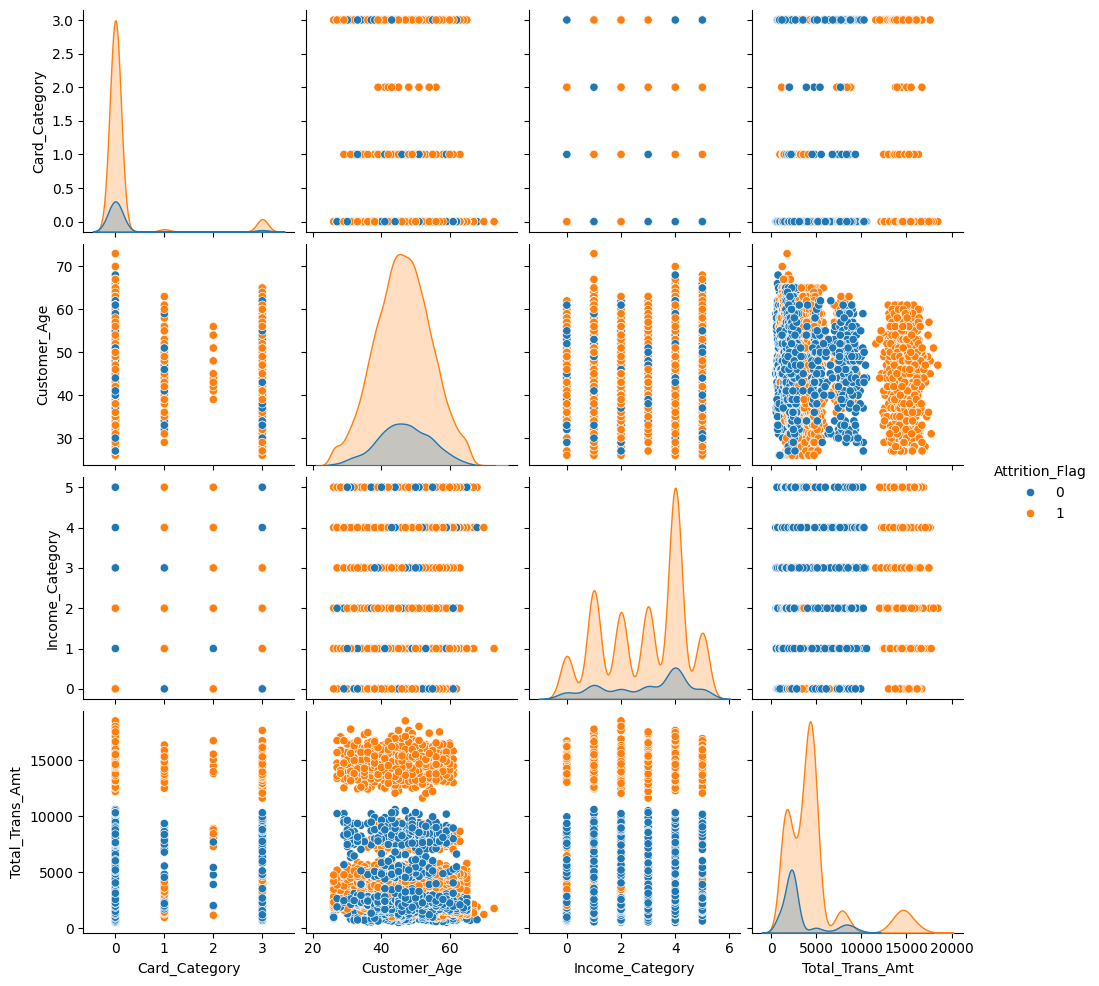

In [ ]:
sns.pairplot(data[['Card_Category', 'Customer_Age', 'Income_Category', 'Total_Trans_Amt', 'Attrition_Flag']], hue = 'Attrition_Flag')